In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# ✅ Load and Preprocess the MNIST Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display the shape of the dataset
print(f"X_train shape: {X_train.shape}")  # (60000, 28, 28). 
print(f"y_train shape: {y_train.shape}")  # (60000,)
print(f"X_test shape: {X_test.shape}")    # (10000, 28, 28)
print(f"y_test shape: {y_test.shape}")    # (10000,)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


(28, 28)
--------------------
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 

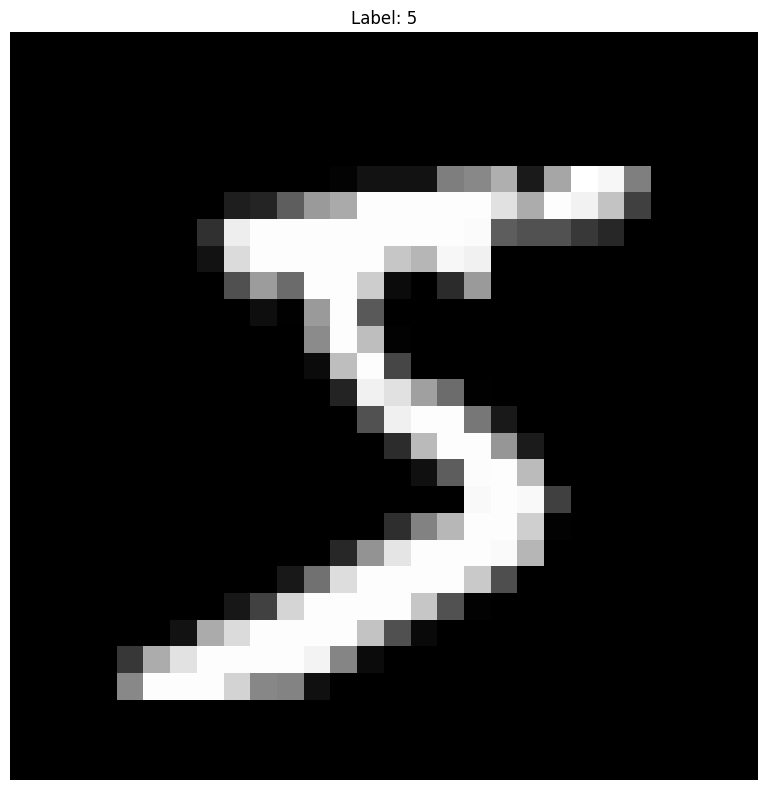

In [42]:
# Lets look at the first image data and also plot it. We are trybing to understand the image data
img_idx=0

print(X_train[img_idx].shape)
print("--------------------")
np.set_printoptions(linewidth=150, precision=2, suppress=True)  # Adjust formatting
print(X_train[img_idx])
print("*********************")
plt.figure(figsize=(8,8))  # Set the figure size

plt.imshow(X_train[img_idx],
           cmap='gray' # # Display the image in grayscale. comment it out if u want to see color
)  
plt.title(f"Label: {y_train[img_idx]}")  # Set the title as the label
plt.axis('off')  # Turn off axis
plt.tight_layout()
plt.show()

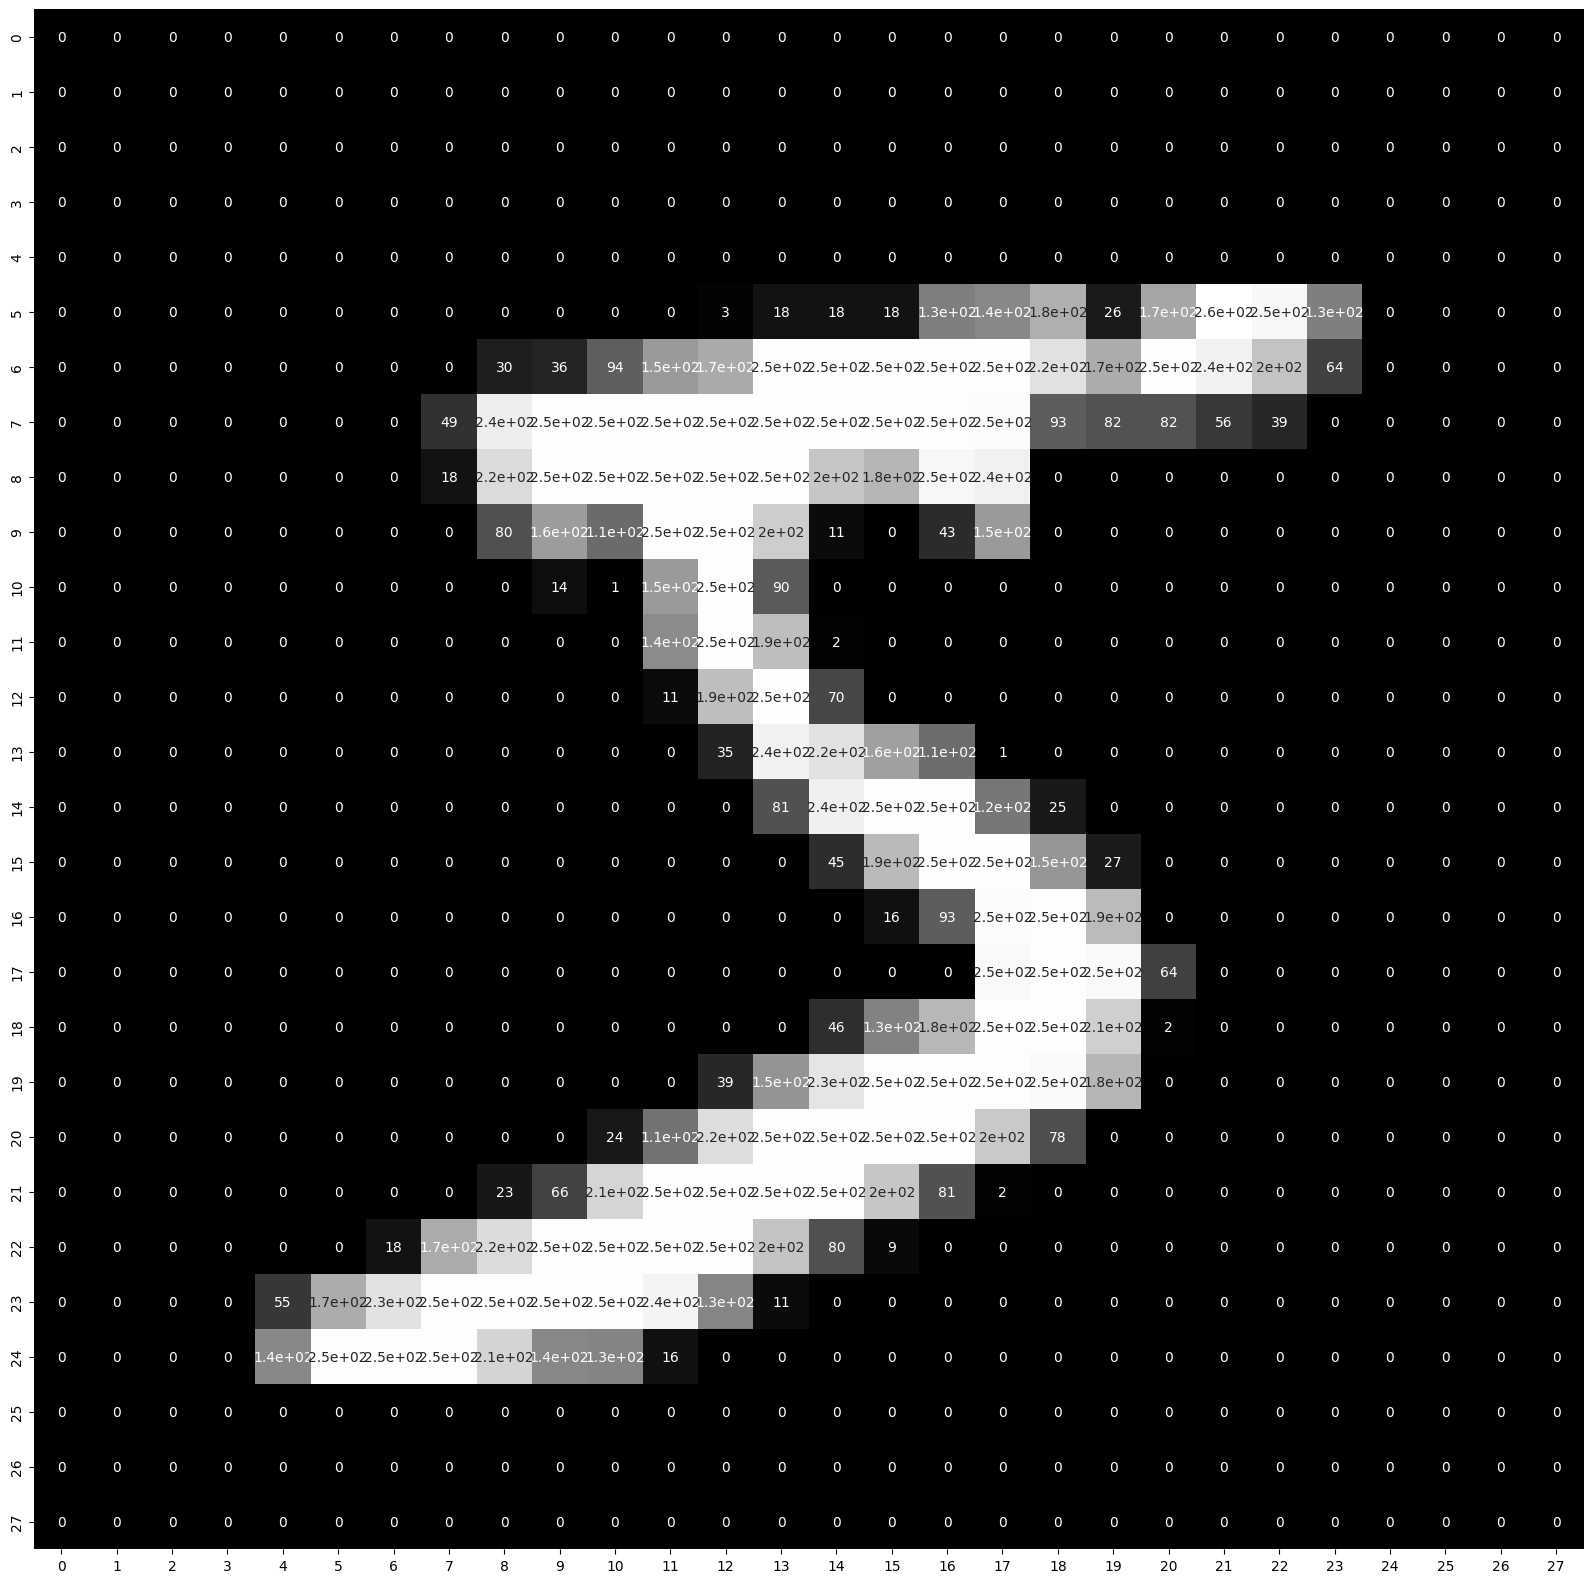

In [43]:
import seaborn as sns
# Lets visualize above using heatmap.

plt.figure(figsize=(20, 20))
sns.heatmap(X_train[img_idx], annot=True, cmap="gray", cbar=False)
plt.show()

In [47]:
# Before one-hot-encodeing
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [3]:
# ✅ Reshape input to (32,32,1) to match LeNet-5 input size
X_train = tf.image.resize_with_pad(X_train[..., None], 32, 32) / 255.0
X_test = tf.image.resize_with_pad(X_test[..., None], 32, 32) / 255.0

# ✅ Convert labels to categorical (One-hot encoding)
# each label will be converted into a 10-dimensional one-hot encoded vector.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

for i, vector in enumerate(y_train[:7]):
    print(f"Class {i}: {vector}")

Class 0: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Class 1: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Class 2: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Class 3: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Class 4: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Class 5: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Class 6: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [4]:
# ✅ Define the LeNet-5 Model
model = models.Sequential([
    layers.Conv2D(6, (5,5), activation='tanh', padding='same', input_shape=(32,32,1)),  # C1: Convolution
    layers.AvgPool2D((2,2), strides=2),  # S2: Subsampling
    
    layers.Conv2D(16, (5,5), activation='tanh'),  # C3: Convolution
    layers.AvgPool2D((2,2), strides=2),  # S4: Subsampling
    
    layers.Conv2D(120, (5,5), activation='tanh'),  # C5: Fully Connected Convolution
    layers.Flatten(),  # Flatten before Dense layer
    
    layers.Dense(84, activation='tanh'),  # F6: Fully Connected
    layers.Dense(10, activation='softmax')  # Output Layer
])

model.summary()


c:\Users\hi\Desktop\projects\python_projects\tutorial\tut_tensorflow\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 16, 16, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 6, 6, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 2, 2, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │          40,404 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,946 (359.16 KB)

 Trainable params: 91,946 (359.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ✅ Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9816 - loss: 0.0590

Test Accuracy: 0.9839


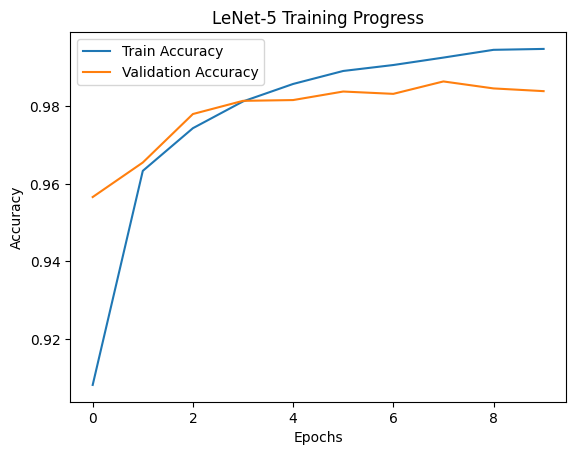

In [28]:
# ✅ Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# ✅ Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LeNet-5 Training Progress')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


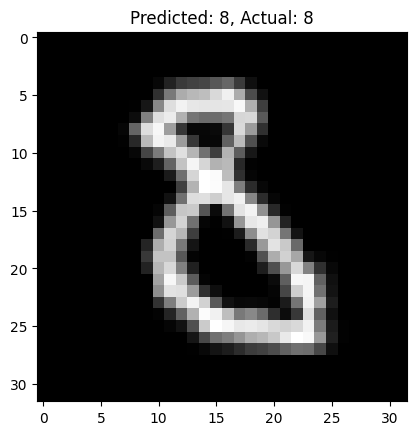

In [27]:
# ✅ Sample Prediction
import numpy as np
sample_idx = np.random.randint(len(X_test))
sample_img = X_test[sample_idx]
predicted_label = np.argmax(model.predict(sample_img[None, ...]))
actual_label = np.argmax(y_test[sample_idx])

plt.imshow(sample_img.numpy().squeeze(), cmap='gray')

plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
plt.show()
